In [24]:


import pandas as pd

# ✅ Use raw string to avoid backslash issues
file_path = r"C:\Users\ss6365\Desktop\dataset_pet\adult_pair_edu_occ.csv"

# ✅ Load the CSV file
df = pd.read_csv(file_path)

# ✅ Display first few rows
print(df.head())


   X1  X2
0   0   0
1   0   1
2   1   2
3   2   2
4   0   3


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# Typography / plot style (legends are mechanism names only)
mpl.rc('font', family='serif', serif=['Times New Roman'])
mpl.rcParams.update({
    'text.usetex': False,
    'font.size': 16,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'figure.titlesize': 20,
})
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 30


In [54]:
for col in df.columns:
    print(f"\n=== {col} Unique Values ===")
    print(df[col].unique())


=== X1 Unique Values ===
[1 0]

=== X2 Unique Values ===
[0 1]


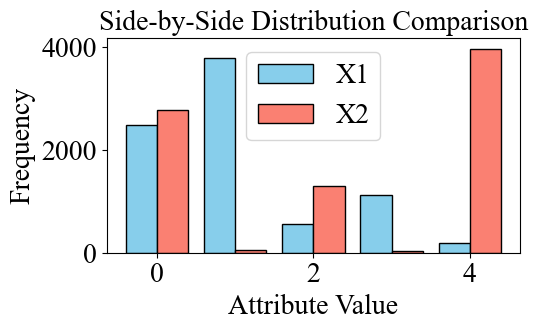

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (example: mushroom.csv)
df = pd.read_csv(r"C:\Users\ss6365\Desktop\dataset_pet\mushroom.csv")

# Get unique sorted domain (works even if values differ)
x_values = sorted(set(df['X1']).union(df['X2']))

# === 1️⃣ SIDE-BY-SIDE BARS ===
plt.figure(figsize=(6, 4))
plt.bar(
    [x - 0.2 for x in x_values],
    df['X1'].value_counts().sort_index().reindex(x_values, fill_value=0),
    width=0.4, label='X1', color='skyblue', edgecolor='black'
)
plt.bar(
    [x + 0.2 for x in x_values],
    df['X2'].value_counts().sort_index().reindex(x_values, fill_value=0),
    width=0.4, label='X2', color='salmon', edgecolor='black'
)
plt.title("Side-by-Side Distribution Comparison")
plt.xlabel("Attribute Value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


# # === 2️⃣ OVERLAPPING BARS ===
# plt.figure(figsize=(6, 4))
# plt.hist(df['X1'], bins=range(int(df[['X1','X2']].max().max()) + 2),
#          alpha=0.6, label='X1', color='skyblue', edgecolor='black')
# plt.hist(df['X2'], bins=range(int(df[['X1','X2']].max().max()) + 2),
#          alpha=0.6, label='X2', color='salmon', edgecolor='black')
# plt.title("Overlapping Distribution Comparison")
# plt.xlabel("Attribute Value")
# plt.ylabel("Frequency")
# plt.legend()
# plt.tight_layout()
# plt.show()


Using columns: ['X1', 'X2', 'X3']


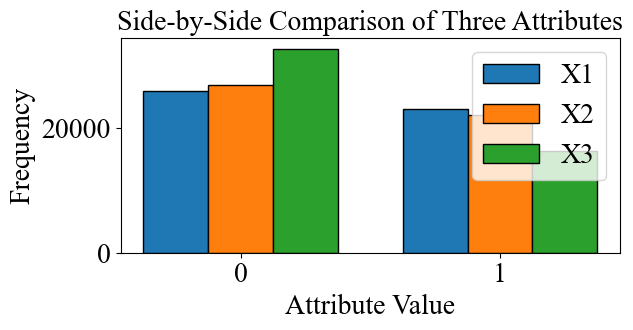

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\ss6365\Desktop\dataset_pet\adult_triple_mar_rel_sex.csv")

# Get the first three numeric columns (or pick manually)
cols = df.select_dtypes(include="number").columns[:3]
print("Using columns:", cols.tolist())

# Create combined domain
x_values = sorted(set(df[cols[0]]).union(df[cols[1]]).union(df[cols[2]]))

# Compute frequencies for each column
freqs = [df[c].value_counts().sort_index().reindex(x_values, fill_value=0) for c in cols]

# Plot
bar_width = 0.25
x_positions = np.arange(len(x_values))

plt.figure(figsize=(7, 4))
for i, col in enumerate(cols):
    plt.bar(
        x_positions + (i - 1) * bar_width,
        freqs[i],
        width=bar_width,
        label=col,
        edgecolor="black"
    )

plt.xticks(x_positions, x_values)
plt.title("Side-by-Side Comparison of Three Attributes")
plt.xlabel("Attribute Value")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load all four datasets
files = {
    "clave": r"C:\Users\ss6365\Desktop\dataset_pet\clave.csv",
    "mushroom": r"C:\Users\ss6365\Desktop\dataset_pet\mushroom.csv",
    "adult_triple_mar_rel_sex": r"C:\Users\ss6365\Desktop\dataset_pet\adult_triple_mar_rel_sex.csv"
}

results = {}

for name, path in files.items():
    df = pd.read_csv(path)
    numeric_cols = df.select_dtypes(include="number").columns

    stats = {
        "shape": df.shape,
        "columns": df.columns.tolist(),
        "numeric_summary": df.describe(include="number") if len(numeric_cols) > 0 else "No numeric columns",
        "skewness": {col: skew(df[col].dropna()) for col in numeric_cols},
        "kurtosis": {col: kurtosis(df[col].dropna()) for col in numeric_cols},
        "distributions": {col: df[col].value_counts(normalize=True).sort_index() for col in numeric_cols}
    }

    results[name] = stats

results_summary = {
    k: {
        "shape": v["shape"],
        "columns": v["columns"],
        "skewness": v["skewness"],
        "kurtosis": v["kurtosis"],
        "distributions": {col: v["distributions"][col].to_dict() for col in v["distributions"]}
    }
    for k, v in results.items()
}

results_summary


{'clave': {'shape': (10800, 2),
  'columns': ['X1', 'X2'],
  'skewness': {'X1': np.float64(0.011852059955691673),
   'X2': np.float64(0.41337101410673605)},
  'kurtosis': {'X1': np.float64(-1.9998595286748075),
   'X2': np.float64(-1.8291244046963684)},
  'distributions': {'X1': {0: 0.502962962962963, 1: 0.49703703703703705},
   'X2': {0: 0.6012037037037037, 1: 0.3987962962962963}}},
 'mushroom': {'shape': (8124, 2),
  'columns': ['X1', 'X2'],
  'skewness': {'X1': np.float64(0.9476773425430853),
   'X2': np.float64(-0.28996465324345516)},
  'kurtosis': {'X1': np.float64(0.0889672969601607),
   'X2': np.float64(-1.7084543184642098)},
  'distributions': {'X1': {0: 0.3052683407188577,
    1: 0.464795667159035,
    2: 0.06843919251600197,
    3: 0.137863121614968,
    4: 0.023633677991137372},
   'X2': {0: 0.3417035942885278,
    1: 0.005908419497784343,
    2: 0.15952732644017725,
    3: 0.004431314623338257,
    4: 0.48842934515017233}}},
 'adult_triple_mar_rel_sex': {'shape': (48842, 3)

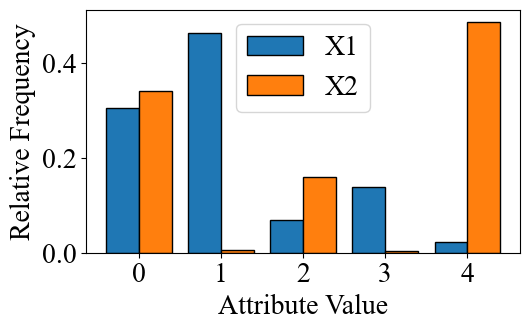

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\ss6365\Desktop\dataset_pet\mushroom.csv")

# Define all numeric attributes you want to compare
cols = ['X1', 'X2']   # can extend to ['X1', 'X2', 'X3']

# Build the shared domain of attribute values
x_values = sorted(set().union(*[set(df[c]) for c in cols]))
x_positions = np.arange(len(x_values))
bar_width = 0.8 / len(cols)  # keeps bars compactly grouped

# Compute relative frequencies for each column
freqs = [df[c].value_counts(normalize=True).sort_index().reindex(x_values, fill_value=0) for c in cols]

# Plot grouped bars
plt.figure(figsize=(6, 4))
for i, col in enumerate(cols):
    plt.bar(
        x_positions + (i - (len(cols)-1)/2)*bar_width,
        freqs[i].values,
        width=bar_width,
        label=col,
        edgecolor='black'
    )

plt.xticks(x_positions, x_values)
plt.xlabel("Attribute Value")
plt.ylabel("Relative Frequency")
#plt.title("Grouped Relative Frequency Distribution")
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Optional, Sequence, Union

def plot_grouped_value_distribution(
    df: pd.DataFrame,
    cols: Sequence[str],
    *,
    normalize: bool = True,                 # True => relative frequency; False => raw counts
    x_label: str = "Attribute Value",
    y_label: str = "Rel. Frequency",
    title: Optional[str] = None,
    figsize: tuple = (6, 4),
    palette: Optional[Sequence[str]] = None, # e.g., ["#4C78A8", "#F58518", "#54A24B"]
    bar_edgecolor: str = "black",
    bar_alpha: float = 1.0,
    bar_gap: float = 0.8,                   # total width used by the grouped bars at a single x
    label_rotation: int = 0,
    font_sizes: Dict[str, Union[int, float]] = None,  # {"title": 13, "axes": 11, "ticks": 9, "legend": 10}
    save_path: Optional[str] = None,
    dpi: int = 300,
    tight_layout: bool = True
):
    """
    Draw grouped bars for the value distribution of multiple attributes (cols).
    Works for discrete/integer-like columns (categorical codes or small integer domains).
    """

    if font_sizes is None:
        font_sizes = {"title": 13, "axes": 11, "ticks": 9, "legend": 10}

    # Build shared domain of values across selected columns
    domains = [set(df[c].dropna().unique()) for c in cols]
    x_values = sorted(set().union(*domains))
    x_positions = np.arange(len(x_values))

    # Compute (relative) frequencies aligned to shared domain
    series_list = []
    for c in cols:
        vc = df[c].value_counts(normalize=normalize).sort_index()
        series_list.append(vc.reindex(x_values, fill_value=0))

    # Figure setup
    fig, ax = plt.subplots(figsize=figsize)

    # Colors
    if palette is None:
        # Use matplotlib defaults if no palette provided
        palette = [None] * len(cols)
    elif len(palette) < len(cols):
        # Repeat palette if shorter than number of cols
        repeats = int(np.ceil(len(cols) / len(palette)))
        palette = list(palette) * repeats
        palette = palette[:len(cols)]

    # Bar geometry
    group_width = min(max(bar_gap, 0.2), 0.95)  # clamp a reasonable range
    bar_width = group_width / len(cols)

    # Plot bars
    for i, (c, s) in enumerate(zip(cols, series_list)):
        offsets = x_positions + (i - (len(cols) - 1) / 2) * bar_width
        ax.bar(
            offsets,
            s.values,
            width=bar_width,
            label=c,
            edgecolor=bar_edgecolor,
            alpha=bar_alpha,
            color=palette[i]
        )

    # Axes labels and ticks
    ax.set_xlabel(x_label, fontsize=font_sizes["axes"])
    ax.set_ylabel(y_label if normalize else "Frequency", fontsize=font_sizes["axes"])
    # if title:
    #     ax.set_title(title, fontsize=font_sizes["title"])

    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_values, rotation=label_rotation)
    ax.tick_params(axis='both', labelsize=font_sizes["ticks"])

    # Legend
    leg = ax.legend(fontsize=font_sizes["legend"])
    if leg:
        leg.set_title(None)

    # Y limit for normalized case
    if normalize:
        ax.set_ylim(0, 1.0)

    if tight_layout:
        plt.tight_layout()

    # Save if requested
    if save_path is not None:
        plt.savefig(save_path, dpi=dpi, bbox_inches="tight")
        # Optional: print where it was saved for logging
        print(f"Saved figure to: {save_path}")

    plt.show()
    plt.close(fig)


Saved figure to: C:\Users\ss6365\Desktop\dataset_pet\fig_adult_grouped.pdf


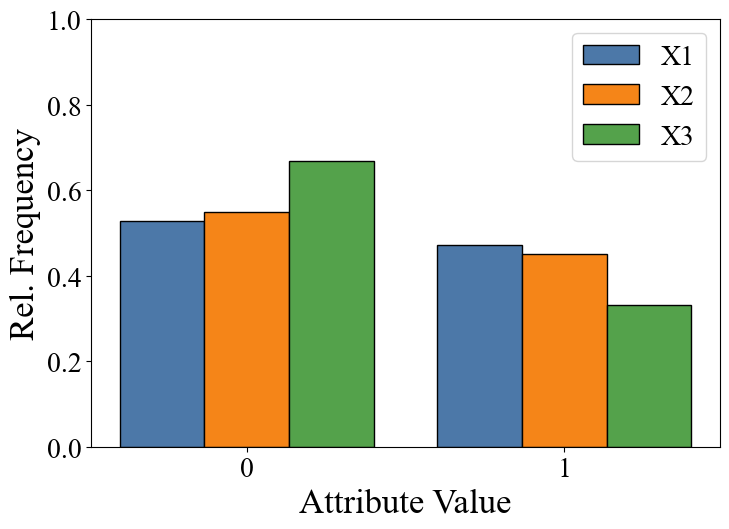

In [87]:
# Example 1 — adult (X1, X2), relative frequency, custom sizes/colors, save PNG
df_t = pd.read_csv(r"C:\Users\ss6365\Desktop\dataset_pet\adult_triple_mar_rel_sex.csv")
plot_grouped_value_distribution(
    df_t,
    cols=["X1", "X2", "X3"],
    normalize=True,
    title="Mushroom — Relative Frequency by Attribute",
    x_label="Attribute Value",
    y_label="Rel. Frequency",   # use "Empirical Probability" if you prefer
    figsize=(8,6),
    palette=["#4C78A8", "#F58518", "#54A24B"],
    bar_edgecolor="black",
    bar_alpha=1.0,
    bar_gap=0.8,
    label_rotation=0,
    font_sizes={"title": 14, "axes": 25, "ticks": 20, "legend": 20},
    save_path=r"C:\Users\ss6365\Desktop\dataset_pet\fig_adult_grouped.pdf",
   
)

Saved figure to: C:\Users\ss6365\Desktop\dataset_pet\fig_mushroom_grouped.pdf


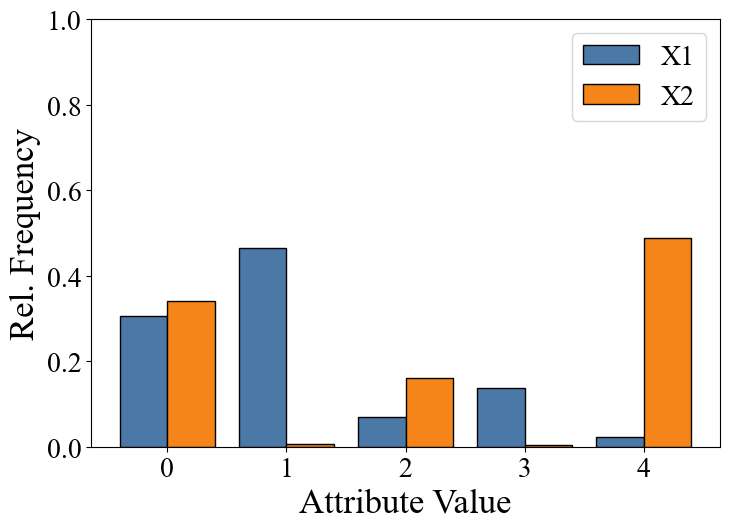

In [88]:
# Example 1 — Mushroom (X1, X2), relative frequency, custom sizes/colors, save PNG
df_m = pd.read_csv(r"C:\Users\ss6365\Desktop\dataset_pet\mushroom.csv")
plot_grouped_value_distribution(
    df_m,
    cols=["X1", "X2"],
    normalize=True,
    title="Mushroom — Relative Frequency by Attribute",
    x_label="Attribute Value",
    y_label="Rel. Frequency",   # use "Empirical Probability" if you prefer
    figsize=(8, 6),
    palette=["#4C78A8", "#F58518"],
    bar_edgecolor="black",
    bar_alpha=1.0,
    bar_gap=0.8,
    label_rotation=0,
    font_sizes={"title": 14, "axes": 25, "ticks": 20, "legend": 20},
    save_path=r"C:\Users\ss6365\Desktop\dataset_pet\fig_mushroom_grouped.pdf",
)


Saved figure to: C:\Users\ss6365\Desktop\dataset_pet\fig_clave_grouped.pdf


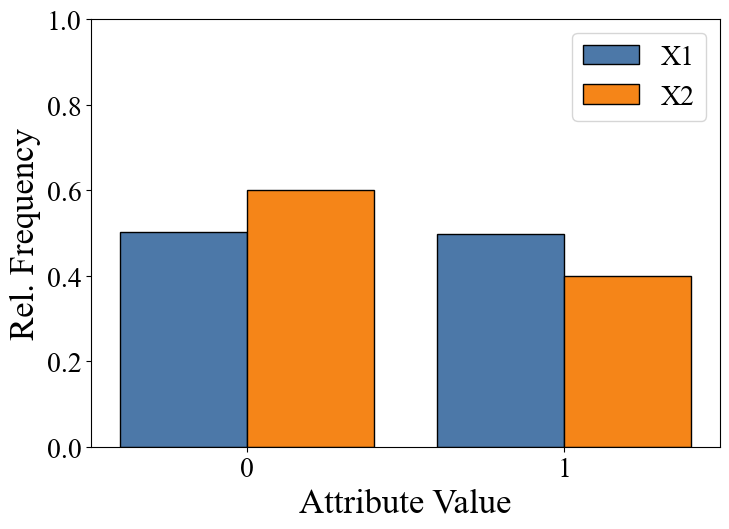

In [89]:

# Example 1 — Mushroom (X1, X2), relative frequency, custom sizes/colors, save PNG
df_c = pd.read_csv(r"C:\Users\ss6365\Desktop\dataset_pet\clave.csv")
plot_grouped_value_distribution(
    df_c,
    cols=["X1", "X2"],
    normalize=True,
    title="Mushroom — Relative Frequency by Attribute",
    x_label="Attribute Value",
    y_label="Rel. Frequency",   # use "Empirical Probability" if you prefer
    figsize=(8,6),
    palette=["#4C78A8", "#F58518", "#54A24B"],
    bar_edgecolor="black",
    bar_alpha=1.0,
    bar_gap=0.8,
    label_rotation=0,
    font_sizes={"title": 14, "axes": 25, "ticks": 20, "legend": 20},
    save_path=r"C:\Users\ss6365\Desktop\dataset_pet\fig_clave_grouped.pdf",
   
)


=== STAR MODEL ===
Shape: (20000, 4)

--- X1 ---
Value distribution:
X1
0    0.39920
1    0.30285
2    0.19885
3    0.09910
Name: proportion, dtype: float64
Skewness: 0.6038887500938696
Kurtosis: -0.7867076303512817

--- X2 ---
Value distribution:
X2
0    0.38100
1    0.29880
2    0.20365
3    0.11655
Name: proportion, dtype: float64
Skewness: 0.540478309925195
Kurtosis: -0.9042460317293224

--- X3 ---
Value distribution:
X3
0    0.38565
1    0.29775
2    0.20180
3    0.11480
Name: proportion, dtype: float64
Skewness: 0.5536745427391508
Kurtosis: -0.8893225844347596

--- X4 ---
Value distribution:
X4
0    0.38520
1    0.29640
2    0.20385
3    0.11455
Name: proportion, dtype: float64
Skewness: 0.5478795894896497
Kurtosis: -0.8975767758715665


C:\Users\ss6365\AppData\Local\Temp\ipykernel_30964\3818514105.py:110: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


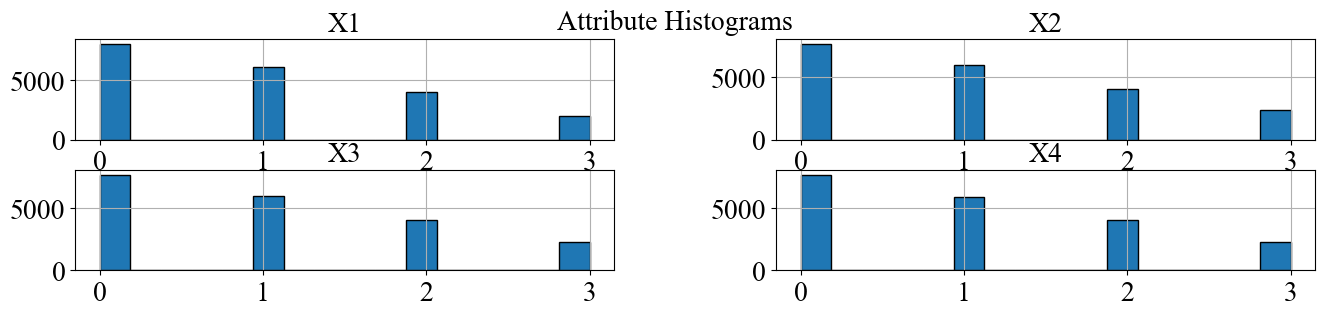


=== PROGRESSIVE MODEL ===
Shape: (20000, 4)

--- X1 ---
Value distribution:
X1
0    0.39920
1    0.30285
2    0.19885
3    0.09910
Name: proportion, dtype: float64
Skewness: 0.6038887500938696
Kurtosis: -0.7867076303512817

--- X2 ---
Value distribution:
X2
0    0.38100
1    0.29880
2    0.20365
3    0.11655
Name: proportion, dtype: float64
Skewness: 0.540478309925195
Kurtosis: -0.9042460317293224

--- X3 ---
Value distribution:
X3
0    0.38625
1    0.29820
2    0.20130
3    0.11425
Name: proportion, dtype: float64
Skewness: 0.5567468418309751
Kurtosis: -0.883938891671201

--- X4 ---
Value distribution:
X4
0    0.37310
1    0.29235
2    0.20545
3    0.12910
Name: proportion, dtype: float64
Skewness: 0.5024162609532176
Kurtosis: -0.981030252968921


C:\Users\ss6365\AppData\Local\Temp\ipykernel_30964\3818514105.py:110: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


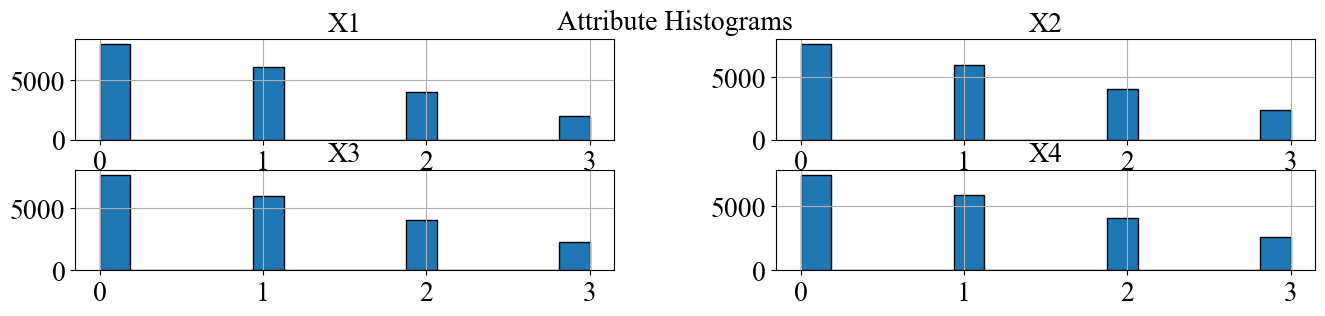

In [91]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

############################################################
# Helpers
############################################################
def _as_vec(domain, probs):
    """Convert probs to a normalized numpy array aligned to domain."""
    probs = np.asarray(probs, dtype=float)
    probs = probs / probs.sum()
    if len(probs) != len(domain):
        raise ValueError("probabilities must match domain length")
    return probs

def _maybe_int(arr):
    """Convert to int if possible."""
    try:
        return arr.astype(int)
    except Exception:
        return arr

############################################################
# STAR Model Generator
############################################################
def gen_star_from_x1(
    n,
    domain,
    d,
    x1_marginal,
    rho,
    q_marginal=None,
    seed=None,
):
    """STAR dependency: X1 is the pivot."""
    if seed is not None:
        np.random.seed(seed)
    domain = list(domain)
    k = len(domain)
    p = _as_vec(domain, x1_marginal)
    q = _as_vec(domain, q_marginal if q_marginal is not None else np.ones(k)/k)
    rho = float(np.clip(rho, 0, 1))

    X1 = np.array(domain)[np.random.choice(k, size=n, p=p)]
    data = {"X1": _maybe_int(X1)}

    for j in range(2, d+1):
        copy_mask = np.random.rand(n) < rho
        Xj = np.empty(n, dtype=object)
        Xj[copy_mask] = X1[copy_mask]
        non_idx = np.where(~copy_mask)[0]
        if non_idx.size:
            Xj[non_idx] = np.array(domain)[np.random.choice(k, size=non_idx.size, p=q)]
        data[f"X{j}"] = _maybe_int(Xj)
    return pd.DataFrame(data)

############################################################
# PROGRESSIVE Model Generator
############################################################
def gen_progressive(
    n,
    domain,
    d,
    x1_marginal,
    rho,
    q_marginal=None,
    seed=None,
):
    """PROGRESSIVE dependency."""
    if seed is not None:
        np.random.seed(seed)
    domain = list(domain)
    k = len(domain)
    p = _as_vec(domain, x1_marginal)
    q = _as_vec(domain, q_marginal if q_marginal is not None else np.ones(k)/k)
    rho = float(np.clip(rho, 0, 1))

    X = {}
    X1 = np.array(domain)[np.random.choice(k, size=n, p=p)]
    X["X1"] = _maybe_int(X1)

    for j in range(2, d+1):
        parent = np.random.randint(1, j)
        copy_mask = np.random.rand(n) < rho
        Xj = np.empty(n, dtype=object)
        parent_vals = X[f"X{parent}"]
        Xj[copy_mask] = parent_vals[copy_mask]
        non_idx = np.where(~copy_mask)[0]
        if non_idx.size:
            Xj[non_idx] = np.array(domain)[np.random.choice(k, size=non_idx.size, p=q)]
        X[f"X{j}"] = _maybe_int(Xj)
    return pd.DataFrame(X)

############################################################
# Analysis Function
############################################################
def analyze_dataset(df):
    print(f"Shape: {df.shape}")
    for col in df.columns:
        vals = df[col]
        print(f"\n--- {col} ---")
        print("Value distribution:")
        print(vals.value_counts(normalize=True).sort_index())
        print(f"Skewness: {skew(vals)}")
        print(f"Kurtosis: {kurtosis(vals)}")

    df.hist(figsize=(4*len(df.columns), 3), bins=len(df.columns)*4, edgecolor='black')
    plt.suptitle("Attribute Histograms")
    plt.tight_layout()
    plt.show()

############################################################
# Example usage
############################################################
if __name__ == "__main__":
    # Parameters
    n = 20000
    domain = [0, 1, 2, 3]
    d = 4
    rho = 0.9
    x1_marginal = [0.4, 0.3, 0.2, 0.1]  # moderately skewed
    q_marginal = [0.25, 0.25, 0.25, 0.25]  # uniform

    print("\n=== STAR MODEL ===")
    df_star = gen_star_from_x1(n, domain, d, x1_marginal, rho, q_marginal, seed=42)
    analyze_dataset(df_star)

    print("\n=== PROGRESSIVE MODEL ===")
    df_prog = gen_progressive(n, domain, d, x1_marginal, rho, q_marginal, seed=42)
    analyze_dataset(df_prog)
